# **Sleep disroders prediction model training**

In [1]:
import pandas as pd
from sklearn.model_selection import GroupShuffleSplit

## Loading the Data

In [2]:
df = pd.read_csv("/content/Sleep_Data_Sampled.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14996,14997,Female,59,Nurse,8.00,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14997,14998,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
14998,14999,Female,59,Nurse,8.10,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Making a row signrature
Since there is a lot of duplication, we don't want data leakage in the form of test and train overlap.

In [3]:
df['row_signature'] = df.astype(str).agg('-'.join, axis=1)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,row_signature
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy,1-Male-35-Doctor-6.65-7-50-7-Normal Weight-120...
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy,2-Male-42-Teacher-6.9-8-52-4-Normal-135/90-66-...
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy,3-Male-34-Software Engineer-6.95-7-66-6-Overwe...
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy,4-Male-32-Doctor-6.9-6-52-7-Normal-120/80-71-6...
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy,5-Male-37-Lawyer-6.85-7-60-6-Normal-125/80-71-...


In [5]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'row_signature'],
      dtype='object')

## Making `X` (independent features) and `y` (dependent feature)

In [6]:
X = df[['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'row_signature']]
y = df['Sleep Disorder']
X, y

(       Person ID  Gender  Age         Occupation  Sleep Duration  \
 0              1    Male   35             Doctor            6.65   
 1              2    Male   42            Teacher            6.90   
 2              3    Male   34  Software Engineer            6.95   
 3              4    Male   32             Doctor            6.90   
 4              5    Male   37             Lawyer            6.85   
 ...          ...     ...  ...                ...             ...   
 14995      14996  Female   59              Nurse            8.10   
 14996      14997  Female   59              Nurse            8.00   
 14997      14998  Female   59              Nurse            8.10   
 14998      14999  Female   59              Nurse            8.10   
 14999      15000  Female   59              Nurse            8.10   
 
        Quality of Sleep  Physical Activity Level  Stress Level   BMI Category  \
 0                     7                       50             7  Normal Weight   
 1    

In [13]:
X.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'row_signature'],
      dtype='object')

## dropping irrelavant features
- `Person ID` is primary key and doesn't have ny significance in training.

## Reducing classes of `BMI Category`
- duting eda, it was found that `BMI category` has two distinct classes of 'normal' and 'normal weight'. They boht should be a single class.

In [14]:
X.replace('Normal Weight', 'Normal', inplace=True)
X.drop(columns=['Person ID'], inplace=True)

print(X.columns)
print(X['BMI Category'].value_counts())

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'row_signature'],
      dtype='object')
BMI Category
Overweight    8755
Normal        5586
Obese          659
Name: count, dtype: int64


/tmp/ipython-input-574283763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('Normal Weight', 'Normal', inplace=True)
/tmp/ipython-input-574283763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['Person ID'], inplace=True)


## spliting the test and train data
We are using `GroupShuffleSplit` to avoid overlap of test and train data.

In [26]:
gss = GroupShuffleSplit(test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=df['row_signature']))

In [27]:
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [28]:
X_test, X_train = X_test.drop(columns=['row_signature']), X_train.drop(columns=['row_signature'])

## Making the pipeline

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipe = Pipeline(
    steps=[
        ("scale", StandardScaler())
    ]
)

cat_one_hot_pipe = Pipeline(
    steps=[
        ("oneHot", OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [30]:
cat_col = []
num_col = []
target = "HeartDisease"

for col in X_train.columns:
    if(col == target):
        continue    # this is target variable
    if(df[col].dtype == 'object'):
        cat_col.append(col)
    else:
        num_col.append(col)


## Making the column transformer
A pipeline that will **scale** the numeric data and **encode** the categorical data

In [31]:
preprocessor = ColumnTransformer([
    ("Numerical", num_pipe, num_col),
    ("Categorical", cat_one_hot_pipe, cat_col)
])

preprocessor

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('scale', StandardScaler())]),
                                 ['Age', 'Sleep Duration', 'Quality of Sleep',
                                  'Physical Activity Level', 'Stress Level',
                                  'Heart Rate', 'Daily Steps']),
                                ('Categorical',
                                 Pipeline(steps=[('oneHot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Occupation', 'BMI Category',
                                  'Blood Pressure'])])

## Encoding the target variable

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform y_train and y_test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Update y_train and y_test variables
y_train = y_train_encoded
y_test = y_test_encoded

print("Transformed y_train value counts:")
import pandas as pd
print(pd.Series(y_train).value_counts())

print("\nTransformed y_test value counts:")
print(pd.Series(y_test).value_counts())

print(f"\nOriginal classes: {le.classes_}")
print(f"Mapping: {le.classes_[0]} -> 0, {le.classes_[1]} -> 1, {le.classes_[2]} -> 2")

Transformed y_train value counts:
0    4018
2    4000
1    3982
Name: count, dtype: int64

Transformed y_test value counts:
1    1018
2    1000
0     982
Name: count, dtype: int64

Original classes: ['Healthy' 'Insomnia' 'Sleep Apnea']
Mapping: Healthy -> 0, Insomnia -> 1, Sleep Apnea -> 2


## Trying different algorithms
Also trying each with different combinations of parameters

In [33]:
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import xgboost as xgb

models_list = {
    "K-Nearest Neighbor": {
        "model": KNeighborsClassifier(),
        "params": {
            "kneighborsclassifier__n_neighbors": [3, 5, 7, 9, 15, 25],
            "kneighborsclassifier__weights": ["uniform", "distance"],
            "kneighborsclassifier__metric": ["euclidean", "manhattan", "minkowski"],
            "kneighborsclassifier__p": [1, 2]   # p=1 → manhattan, p=2 → euclidean
        }
    },

    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'randomforestclassifier__n_estimators': [5, 10, 20, 30, 50, 100],
            'randomforestclassifier__max_depth': [2, 5, 7, None],
            'randomforestclassifier__max_samples': [0.5, 0.6, 0.75, 0.9, 1]
        }
    },

    "Adaoost": {
        "model": AdaBoostClassifier(estimator=DecisionTreeClassifier()),
        "params": {
            "adaboostclassifier__n_estimators": [10, 20, 25, 30],
            "adaboostclassifier__learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5],
            "adaboostclassifier__estimator__max_depth": [1, 2, 3],
            "adaboostclassifier__estimator__min_samples_split": [2, 5, 10]
        }
    },

    "LightGBM": {
        "model": lgb.LGBMClassifier(),
        "params": {
            "lgbmclassifier__n_estimators": [50, 100, 200],
            "lgbmclassifier__learning_rate": [0.01, 0.05, 0.1],
            "lgbmclassifier__num_leaves": [15, 31, 63],
            "lgbmclassifier__max_depth": [-1, 5, 10],
            "lgbmclassifier__subsample": [0.6, 0.8, 1.0],
            "lgbmclassifier__colsample_bytree": [0.6, 0.8, 1.0]
        }
    },

    "XGBoost": {
        "model": xgb.XGBClassifier(),
        "params": {
            "xgbclassifier__n_estimators": [50, 100, 200],
            "xgbclassifier__learning_rate": [0.01, 0.05, 0.1],
            "xgbclassifier__max_depth": [3, 5, 7],
            "xgbclassifier__subsample": [0.6, 0.8, 1.0],
            "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0]
        }
    }
}

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score

for model_name, config in models_list.items():
    model = config["model"]
    params = config["params"]

    pipe = make_pipeline(preprocessor, model)

    ran_search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=params,
        scoring='accuracy',
        cv=4,
        verbose=2,
        n_jobs=-1
    )

    ran_search.fit(X_train, y_train)

    print(f"{model_name}:")
    print(f"Best Score: {ran_search.best_score_}")
    print(f"Best parameters: {ran_search.best_params_}")
    print("------------------\n")

Fitting 4 folds for each of 10 candidates, totalling 40 fits
K-Nearest Neighbor:
Best Score: 0.9514166666666666
Best parameters: {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__p': 1, 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__metric': 'minkowski'}
------------------

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Random Forest:
Best Score: 0.95875
Best parameters: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_samples': 0.75, 'randomforestclassifier__max_depth': None}
------------------

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Adaoost:
Best Score: 0.9095833333333333
Best parameters: {'adaboostclassifier__n_estimators': 25, 'adaboostclassifier__learning_rate': 0.3, 'adaboostclassifier__estimator__min_samples_split': 2, 'adaboostclassifier__estimator__max_depth': 2}
------------------

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[LightGBM] [Info] Auto-choosing row-wis

Every algorithm except `AdaBoost` is giving above 95% accuracy. So we will check every other algorithm for recall.

In [36]:
models = [
    KNeighborsClassifier(
        weights='distance',
        p=1,
        n_neighbors=3,
        metric='minkowski'
    ),

    RandomForestClassifier(
        n_estimators=100,
        max_samples=0.75,
        max_depth=None
    ),

    lgb.LGBMClassifier(
        subsample=0.6,
        num_leaves=31,
        n_estimators=100,
        max_depth=10,
        learning_rate=0.05,
        colsample_bytree=0.8,
        random_state=42
    ),

    xgb.XGBClassifier(
        subsample=1.0,
        n_estimators=200,
        max_depth=7,
        learning_rate=0.1,
        colsample_bytree=0.6,
        random_state=42
    )
]

In [40]:
from sklearn.metrics import confusion_matrix


for model in models:
    pipe =  make_pipeline(preprocessor, model)
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    print(model)
    print(confusion_matrix(y_pred=y_pred, y_true=y_test))

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
[[919  36  27]
 [ 20 980  18]
 [ 15  14 971]]
RandomForestClassifier(max_samples=0.75)
[[934  30  18]
 [ 18 985  15]
 [ 10  15 975]]
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 44
[LightGBM] [Info] Start training from score -1.094122
[LightGBM] [Info] Start training from score -1.103122
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=10,
               random_state=42, subsample=0.6)
[[932  29  21]
 [ 13 992  13]
 [  9  10 981]]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)
[[938  28  16]
 [ 15 991  12]
 [ 10   8 982]]


## Conclusion
as every model is having a good recall and precision, we will go with xgboost on the basis of accuracy score only.


In [42]:
pipe = make_pipeline(preprocessor, xgb.XGBClassifier(
        subsample=1.0,
        n_estimators=200,
        max_depth=7,
        learning_rate=0.1,
        colsample_bytree=0.6,
        random_state=42
    ))
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Sleep Duration',
                                                   'Quality of Sleep',
                                                   'Physical Activity Level',
                                                   'Stress Level', 'Heart Rate',
                                                   'Daily Steps']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Occupation',
                                                   'BMI Category...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [43]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Sleep Duration',
                                                   'Quality of Sleep',
                                                   'Physical Activity Level',
                                                   'Stress Level', 'Heart Rate',
                                                   'Daily Steps']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Occupation',
                                                   'BMI Category...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [44]:
y_pred = pipe.predict(X_test)

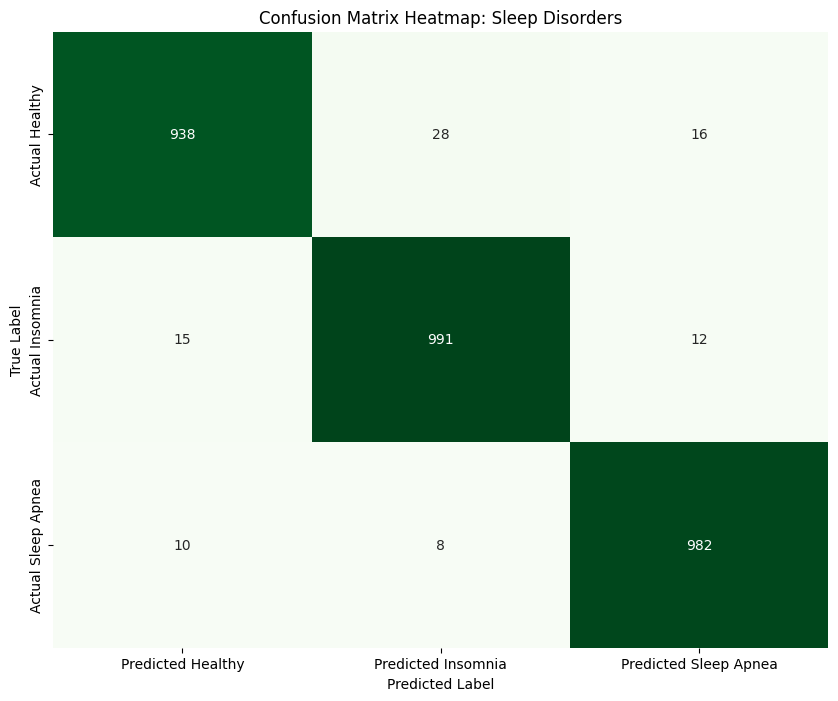

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Healthy', 'Insomnia', 'Sleep Apnea']

plt.figure(figsize=(10, 8)) # Increased size slightly for 3x3
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred),
            annot=True,
            fmt='d',
            cmap='Greens',
            cbar=False,
            xticklabels=[f'Predicted {l}' for l in labels],
            yticklabels=[f'Actual {l}' for l in labels])

plt.title('Confusion Matrix Heatmap: Sleep Disorders')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Picking the the model

In [46]:
import pickle

# Define the filename for the pickle file
filename = 'sleep_disorder_predictor.pkl'

# Open the file in binary write mode and dump the pipe object
with open(filename, 'wb') as file:
    pickle.dump(pipe, file)

print(f"The 'pipe' object has been successfully pickled and saved as '{filename}'")

The 'pipe' object has been successfully pickled and saved as 'sleep_disorder_predictor.pkl'
